# 1. Data Collection

## 1.1. Importing the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss
import datetime
import re
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import pingouin as pg
import scipy.stats as stats
from tabulate import tabulate

## 1.2. Importing the DataSet

In [2]:
pd.set_option('display.max_columns', None)
path = 'G:/immigration/Article/LandSlide/TRACE Survey.xlsx'
df = pd.read_excel(path, sheet_name = 'TRACE Survey (2)')
df.head()

,Timestamp,Experienced Disasters,Frequent Disasters,Landslide Sign,Landslide Sign Desc,Awareness of Mitigation orgs.,Informed of landslide risk,Knowledge of landslide risk,Family landslide exp.,Personal landslide exp.,Help offered post-landslide,post-landslide Fatigue,post-landslide Confusion,post-landslide Impaired concentration,post-landslide Impatience,post-landslide Attention deficit,post-landslide Anxiety,post-landslide Depression,post-landslide Grief,post-landslide Insomnia,post-landslide Fear,post-landslide Other,Water supply problem,Water use post-landslide,Transportation problem,Means of transportation post-landslide,Electricity problem,Electricity use post-landslide,Shelter problem,Shelter solution post-landslide,Earthquake landslide susceptibility,Extremely dry weather landslide susceptibility,Heavy rain landslide susceptibility,Light rain landslide susceptibility,Unstable soil landslide susceptibility,Prolonged rain landslide susceptibility,Wildfire landslide susceptibility,Strong waves landslide susceptibility,Snowmelt landslide susceptibility,Traffic/animal landslide susceptibility,Deforestation landslide susceptibility,Slope/hill cutting landslide susceptibility,Mining activities landslide susceptibility,Settlement increase landslide susceptibility,Road construction landslide susceptibility,Drainage changes landslide susceptibility,Community response to landslide threat,Most impactful natural hazard,Landslide safety perception,Reasons for feeling unsafe/safe,Factors contributing to feeling safe,Awareness of emergency response plan,Landslide evacuation procedure,Government warning information,Community disaster mitigation team,Evacuation route map availability,Evacuation SOP existence,Current landslide mitigation practices,Mitigation Practices Desc.,Ranking of mitigation practices [Regular upkeep and maintenance of drainage pathways],"Ranking of mitigation practices [Installed gabions, retaining walls, and/or other engineered structures for slope failures]",Ranking of mitigation practices [Monitoring of present cracks on the ground],Ranking of mitigation practices [Installed remote monitoring sensors],Effectiveness of mitigation practices,Elaboration on effectiveness,Recovery time after landslide event,Factors affecting recovery time,Farming impact of landslides,GEDSI provisions in emergency response plan,Access to agro-meteorological info,Food security impact of landslides,Farm production and sales impact of landslides,Post-landslide food purchasing increase,Agricultural sector emergency response plan,Food security impact of landslides.1,Sex,Age,Country of residence,Subnational region of residence,Highest education level,Employment status,Annual household expenses,Household size,households Number in community,Migration status,Years since migration,Reason for migration,Local development plan existence,Type of dwelling,Number of floors in dwelling,Year of construction of dwelling,Property insurance status,Official enterprise construction status,Roofing material of dwelling,Construction materials of outer walls,Construction materials of floor,Land-use classification of area,Unnamed: 97
0,2022/06/17 6:05:18 PM CDT,Hurricane/cyclone/typhoon;Flooding;Earthquake;...,Hurricane/cyclone/typhoon;Flooding;Earthquake,"No (if No, proceed to 1.5)",NaN,Yes,No,Yes,No,"No (if No, proceed to Section 2)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,5,2,4,5,1,1,1,1,3,5,3,4,3,4,Our area do not have landslides,Hurricane/cyclone/typhoon,"Yes (if Yes, proceed to 3.4)",NaN,"Living in a flat area, away from slopes","Yes (if Yes, proceed to 3.6)",We do not have landslides in our area,Yes,No,No,No,"No (if No, proceed to 3.14)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Faster,People have resources,I do not live in an agricultural area,No,Yes,We do not have landslides in our area,No,Yes,"Yes (if Yes, proceed to 5.8)",We do not have landslides,Female,Between 18 to 40 years old,Philippines,National Capital Region,Postgr

# 2. Data Understanding

In [6]:
df.shape

(308, 98)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 95 columns):
 #   Column                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                       --------------  -----  
 0   Experienced Disasters                                                                                                        308 non-null    object 
 1   Frequent Disasters                                                                                                           308 non-null    object 
 2   Landslide Sign                                                                                                               308 non-null    object 
 3   Landslide Sign Desc                                                                                                     

In [5]:
df.duplicated().sum()

0

In [6]:
Na_count = df.isna().sum()
Na_count[Na_count>0].sort_values(ascending = False)

Shelter solution post-landslide                                                                                                295
post-landslide Other                                                                                                           294
Water use post-landslide                                                                                                       279
Means of transportation post-landslide                                                                                         266
Electricity use post-landslide                                                                                                 264
Elaboration on effectiveness                                                                                                   260
post-landslide Grief                                                                                                           230
post-landslide Insomnia                                                            

# 3. Data Cleaning

## 3.1. Rename Columns

In [3]:
df.rename(columns = {'Ranking of mitigation practices [Installed gabions, retaining walls, and/or other engineered structures for slope failures]': 'Mitigation practices ranking[engineered structures]',
                    'Ranking of mitigation practices [Regular upkeep and maintenance of drainage pathways]': 'Mitigation practices ranking[maintenance of drainage]',
                    'Ranking of mitigation practices [Monitoring of present cracks on the ground]': 'Mitigation practices ranking[Cracks monitoring]',
                    'Ranking of mitigation practices [Installed remote monitoring sensors]': 'Mitigation practices ranking[remote monitoring sensors]',
                    'Ranking of mitigation practices [Installed gabions, retaining walls, and/or other engineered structures for slope failures]': 'Mitigation practices ranking[engineered structures]',
                    'Ranking of mitigation practices [Regular upkeep and maintenance of drainage pathways]': 'Mitigation practices ranking[maintenance of drainage]',
                    'Ranking of mitigation practices [Monitoring of present cracks on the ground]': 'Mitigation practices ranking[Cracks monitoring]',
                    'Ranking of mitigation practices [Installed remote monitoring sensors]': 'Mitigation practices ranking[remote monitoring sensors]'}
          , inplace = True)

## 3.2. remove the parenthesis part in the fields

In [4]:
cols = ['Landslide Sign', 'Personal landslide exp.', 'Landslide safety perception', 'Awareness of emergency response plan',
       'Agricultural sector emergency response plan', 'Current landslide mitigation practices', 'Water supply problem',
       'Transportation problem', 'Electricity problem', 'Shelter problem', 'Construction materials of outer walls',
       'Type of dwelling', 'Reason for migration', 'Employment status']
df[cols] = df[cols].replace(r'\s*\([\w\d \.,]*\)','',regex= True)

## 3.3. String Fields Manipulation

In [5]:
# Most impactful natural hazard
df['Most impactful natural hazard'] = df['Most impactful natural hazard'].str.strip()
df['Most impactful natural hazard'].replace({'none':np.nan, 
                                            'both of earthquake and heavy rain.': 'Earthquake',
                                            'Heavy rain':'extreme rain',
                                            'Global warming':'High temperature',
                                            'Climate change  & hot weather': 'High temperature',
                                            'Extreme winds': 'Hurricane/cyclone/typhoon',
                                            'Heat wave': 'High temperature'}, inplace=True)

In [6]:
# Recovery time after landslide event
df['Recovery time after landslide event'].replace(
    {'Some will have faster recovery time, some will have slower recovery time': 'Some faster, someslower'}, inplace=True)

In [7]:
# Country of residence
df['Country of residence'] = df['Country of residence'].str.strip()
lookup = {
    'taiwan': 'Taiwan',
    'å°ç£': 'Taiwan',
    'Chittagong': 'Bangladesh',
    'ROC': 'Taiwan',
    'Bangladesh ðŸ‡§ðŸ‡©': 'Bangladesh',
    'Taichung': 'Taiwan',
    'taichung': 'Taiwan', 
    'Chittagong, Bangladesh': 'Bangladesh',
    'Tiger pas area,Chittagong city corporation ,': 'Bangladesh',
    'Taipei': 'Taiwan',
    'Republic of China (Taiwan)': 'Taiwan',
    'Republic of China': 'Taiwan',
    'Republic of china': 'Taiwan',
    'China': 'Taiwan',
    'TAIWAN': 'Taiwan',
    'Taiwan.':'Taiwan',
    'Bangladesh.':'Bangladesh',
    'Taiwan (not a province of China)': 'Taiwan',
    'BANGLADESH': 'Bangladesh',
    'bd': 'Bangladesh',
    'å°å—': 'Taiwan',
    'Cox Bazar': 'Bangladesh',
    'Chottogram, Halishahar': 'Bangladesh',
    'indonesia': 'Indonesia',
    'INDONESIA': 'Indonesia',
    'Portugal.': 'Portugal'}
df['Country of residence'].replace(lookup, inplace = True)

In [8]:
# Mitigation Practices Desc.
df['Mitigation Practices Desc.'].replace(
    {'Regular upkeep and maintenance of drainage pathways': 'maintenance of drainage',
     'Installed gabions, retaining walls, and/or other engineered structures for slope failures' : 'engineered structures',
     'Monitoring of present cracks on the ground' : 'Cracks monitoring',
     'Installed remote monitoring sensors': 'remote monitoring sensors', 'no':np.nan}, regex=True, inplace=True)

In [9]:
# Experienced Disasters
Disasters = ('Earthquake', 'Flooding', 'Hurricane/cyclone/typhoon', 'Landslide', 'Coastal erosion')
df['Experienced Disasters'] = df['Experienced Disasters'].apply(lambda x: ';'.join([i for i in x.split(';') if i in Disasters]))

In [10]:
# Frequent Disasters
df['Frequent Disasters'] = df['Frequent Disasters'].str.replace('River erosion, sidra etc\.', 'River erosion', regex=True)
Disasters = ('Earthquake', 'Flooding', 'Hurricane/cyclone/typhoon', 'Landslide', 'Coastal erosion')
df['Frequent Disasters'] = df['Frequent Disasters'].apply(lambda x: ';'.join([i for i in x.split(';') if i in Disasters]))

In [11]:
# Landslide Sign Desc
df['Landslide Sign Desc'].replace('ç„¡', np.nan, inplace=True)
patterns_sign = {'Cracks on the ground': 'Cracks',
                'Changes in watercourses or groundwater': 'Watercourses change',
                'Presence of muddy streams or minor sloughing': 'Muddy streams',
                'Abnormal noises \(e\.g\., cracking, loud bang, etc\.\)': 'Abnormal noises',
                'Due to heavy rainfall,causing the landslide ': 'heavy rainfall'}
for pattern, replacement in patterns_sign.items():
    df['Landslide Sign Desc'] = df['Landslide Sign Desc'].str.replace(pattern, replacement,regex=True)
    
Landslide_Sign = ('Tilted trees', 'Rockfalls', 'Muddy streams', 'Cracks', 'Watercourses change')
df['Landslide Sign Desc'] = df['Landslide Sign Desc'].apply(lambda x: np.nan if pd.isnull(x) else
                                                            ';'.join([i for i in x.split(';') if i in Landslide_Sign]))

In [12]:
# Most impactful natural hazard
hazards = ('Earthquake', 'Flooding', 'Hurricane/cyclone/typhoon', 'Landslide', 'Coastal erosion', 'Tsunami', 'Wildfire')                       
df['Most impactful natural hazard'] = df['Most impactful natural hazard'].apply(lambda x: x if x in hazards else np.nan)

In [13]:
# Year of construction of dwelling
df['Year of construction of dwelling'] =df['Year of construction of dwelling'].replace(
    r'[\d\s\w-]*floor[\w\d\s]*', '', regex=True).astype(str)
df['Year of construction of dwelling'] =df['Year of construction of dwelling'].str.extract(r'(?=[\w /\-]*)(\d+)(?=[\w ]*)')

for index, value in enumerate(df['Year of construction of dwelling'].values):
    value = str(value)[:4]
    if len(value) == 4:
        value = datetime.datetime.now().year - int(value)
        df['Year of construction of dwelling'].values[index] = int(value)
df['Year of construction of dwelling'] = df['Year of construction of dwelling'].fillna(-1).astype(int)

## 3.4. Eliminating Unnecessary Fields and Records

In [14]:
# we are going to analyze the data of Bangladesh, Taiwan and Portugal
df = df[df['Country of residence'].isin(('Bangladesh', 'Taiwan', 'Portugal'))]

# feature we choose by expert consultation
features = ['Experienced Disasters', 'Frequent Disasters', 'Landslide Sign', 'Landslide Sign Desc', 'Awareness of Mitigation orgs.',
           'Informed of landslide risk', 'Knowledge of landslide risk', 'Family landslide exp.', 'Personal landslide exp.',
           'Earthquake landslide susceptibility', 'Extremely dry weather landslide susceptibility', 'Heavy rain landslide susceptibility',
           'Light rain landslide susceptibility', 'Unstable soil landslide susceptibility', 'Prolonged rain landslide susceptibility',
           'Wildfire landslide susceptibility', 'Strong waves landslide susceptibility', 'Snowmelt landslide susceptibility',
           'Traffic/animal landslide susceptibility', 'Deforestation landslide susceptibility',
           'Mining activities landslide susceptibility', 'Settlement increase landslide susceptibility', 
           'Road construction landslide susceptibility', 'Slope/hill cutting landslide susceptibility',
           'Drainage changes landslide susceptibility', 'Most impactful natural hazard', 'Landslide safety perception',
           'Awareness of emergency response plan', 'Government warning information',
           'Community disaster mitigation team', 'Evacuation route map availability', 'Evacuation SOP existence',
           'Current landslide mitigation practices', 'Mitigation Practices Desc.', 'Mitigation practices ranking[maintenance of drainage]',
           'Mitigation practices ranking[engineered structures]', 'Mitigation practices ranking[Cracks monitoring]', 
           'Mitigation practices ranking[remote monitoring sensors]', 'Effectiveness of mitigation practices', 
           'Recovery time after landslide event', 'GEDSI provisions in emergency response plan', 'Access to agro-meteorological info',
           'Farm production and sales impact of landslides', 'Post-landslide food purchasing increase', 
           'Agricultural sector emergency response plan', 'Sex', 'Age', 'Country of residence']
df = df[features]

In [15]:
nulls = df.isna().sum()
nulls[nulls>0]

Landslide Sign Desc                                        177
Most impactful natural hazard                                9
Landslide safety perception                                  2
Government warning information                              26
Current landslide mitigation practices                       1
Mitigation Practices Desc.                                 213
Mitigation practices ranking[maintenance of drainage]      207
Mitigation practices ranking[engineered structures]        208
Mitigation practices ranking[Cracks monitoring]            208
Mitigation practices ranking[remote monitoring sensors]    215
Effectiveness of mitigation practices                      172
dtype: int64

In [16]:
df.head(5)

,Experienced Disasters,Frequent Disasters,Landslide Sign,Landslide Sign Desc,Awareness of Mitigation orgs.,Informed of landslide risk,Knowledge of landslide risk,Family landslide exp.,Personal landslide exp.,Earthquake landslide susceptibility,Extremely dry weather landslide susceptibility,Heavy rain landslide susceptibility,Light rain landslide susceptibility,Unstable soil landslide susceptibility,Prolonged rain landslide susceptibility,Wildfire landslide susceptibility,Strong waves landslide susceptibility,Snowmelt landslide susceptibility,Traffic/animal landslide susceptibility,Deforestation landslide susceptibility,Mining activities landslide susceptibility,Settlement increase landslide susceptibility,Road construction landslide susceptibility,Slope/hill cutting landslide susceptibility,Drainage changes landslide susceptibility,Most impactful natural hazard,Landslide safety perception,Awareness of emergency response plan,Government warning information,Community disaster mitigation team,Evacuation route map availability,Evacuation SOP existence,Current landslide mitigation practices,Mitigation Practices Desc.,Mitigation practices ranking[maintenance of drainage],Mitigation practices ranking[engineered structures],Mitigation practices ranking[Cracks monitoring],Mitigation practices ranking[remote monitoring sensors],Effectiveness of mitigation practices,Recovery time after landslide event,GEDSI provisions in emergency response plan,Access to agro-meteorological info,Farm production and sales impact of landslides,Post-landslide food purchasing increase,Agricultural sector emergency response plan,Sex,Age,Country of residence
1,Flooding;Earthquake;Landslide;Coastal erosion,Landslide;Coastal erosion,Yes,Tilted trees;Rockfalls;Cracks,Yes,Yes,Yes,Yes,No,3,3,5,1,1,4,3,4,1,1,4,1,4,3,5,3,Coastal erosion,Yes,Yes,Yes,Yes,No,No,Yes,maintenance of drainage;engineered structures;...,1.0,1.0,1.0,4.0,Yes,"Some faster, someslower",Yes,Yes,No,Yes,No,Female,Over 40 years old,Portugal
2,Hurricane/cyclone/typhoon;Flooding;Earthquake,Hurricane/cyclone/typhoon;Flooding,No,NaN,Yes,No,Yes,Yes,No,4,1,5,3,4,5,4,3,5,4,4,4,5,5,5,4,Hurricane/cyclone/typhoon,Yes,Yes,Yes,Yes,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,"Some faster, someslower",Yes,Yes,No,Yes,Yes,Male,Over 40 years old,Taiwan
3,Hurricane/cyclone/typhoon;Flooding;Earthquake;...,Flooding;Earthquake;Landslide,No,NaN,Yes,No,Yes,No,No,2,1,5,3,3,5,1,3,3,1,3,3,4,4,5,4,Earthquake,Yes,Yes,No,Yes,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,"Some faster, someslower",No,No,Yes,Yes,No,Male,Over 40 years old,Taiwan
4,Hurricane/cyclone/typhoon;Flooding;Earthquake;...,Hurricane/cyclone/typhoon;Flooding;Earthquake,Yes,Tilted trees;Watercourses change;Muddy streams...,Yes,Yes,Yes,No,No,4,2,5,2,5,4,3,3,3,3,3,4,4,4,4,4,Landslide,No,Yes,Yes,Yes,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,Yes,"Some faster, someslower",Yes,No,Yes,Yes,No,Male,Over 40 years old,Taiwan
5,Hurricane/cyclone/typhoon;Flooding;Earthquake;...,Hurricane/cyclone/typhoon;Flooding;Earthquake,Yes,Tilted trees;Watercourses change;Muddy streams...,Yes,No,Yes,No,Yes,4,2,5,3,5,4,1,2,1,3,5,3,3,4,5,4,Hurricane/cyclone/typhoon,Yes,Yes,NaN,No,No,No,Yes,maintenance of drainage;engineered structures;...,2.0,3.0,4.0,1.0,Yes,"Some faster, someslower",Yes,Yes,No,Yes,Yes,Male,Between 18 to 40 years old,Taiwan


## Univariate Analysis

### Univariate Analysis of Non Categorical Variables

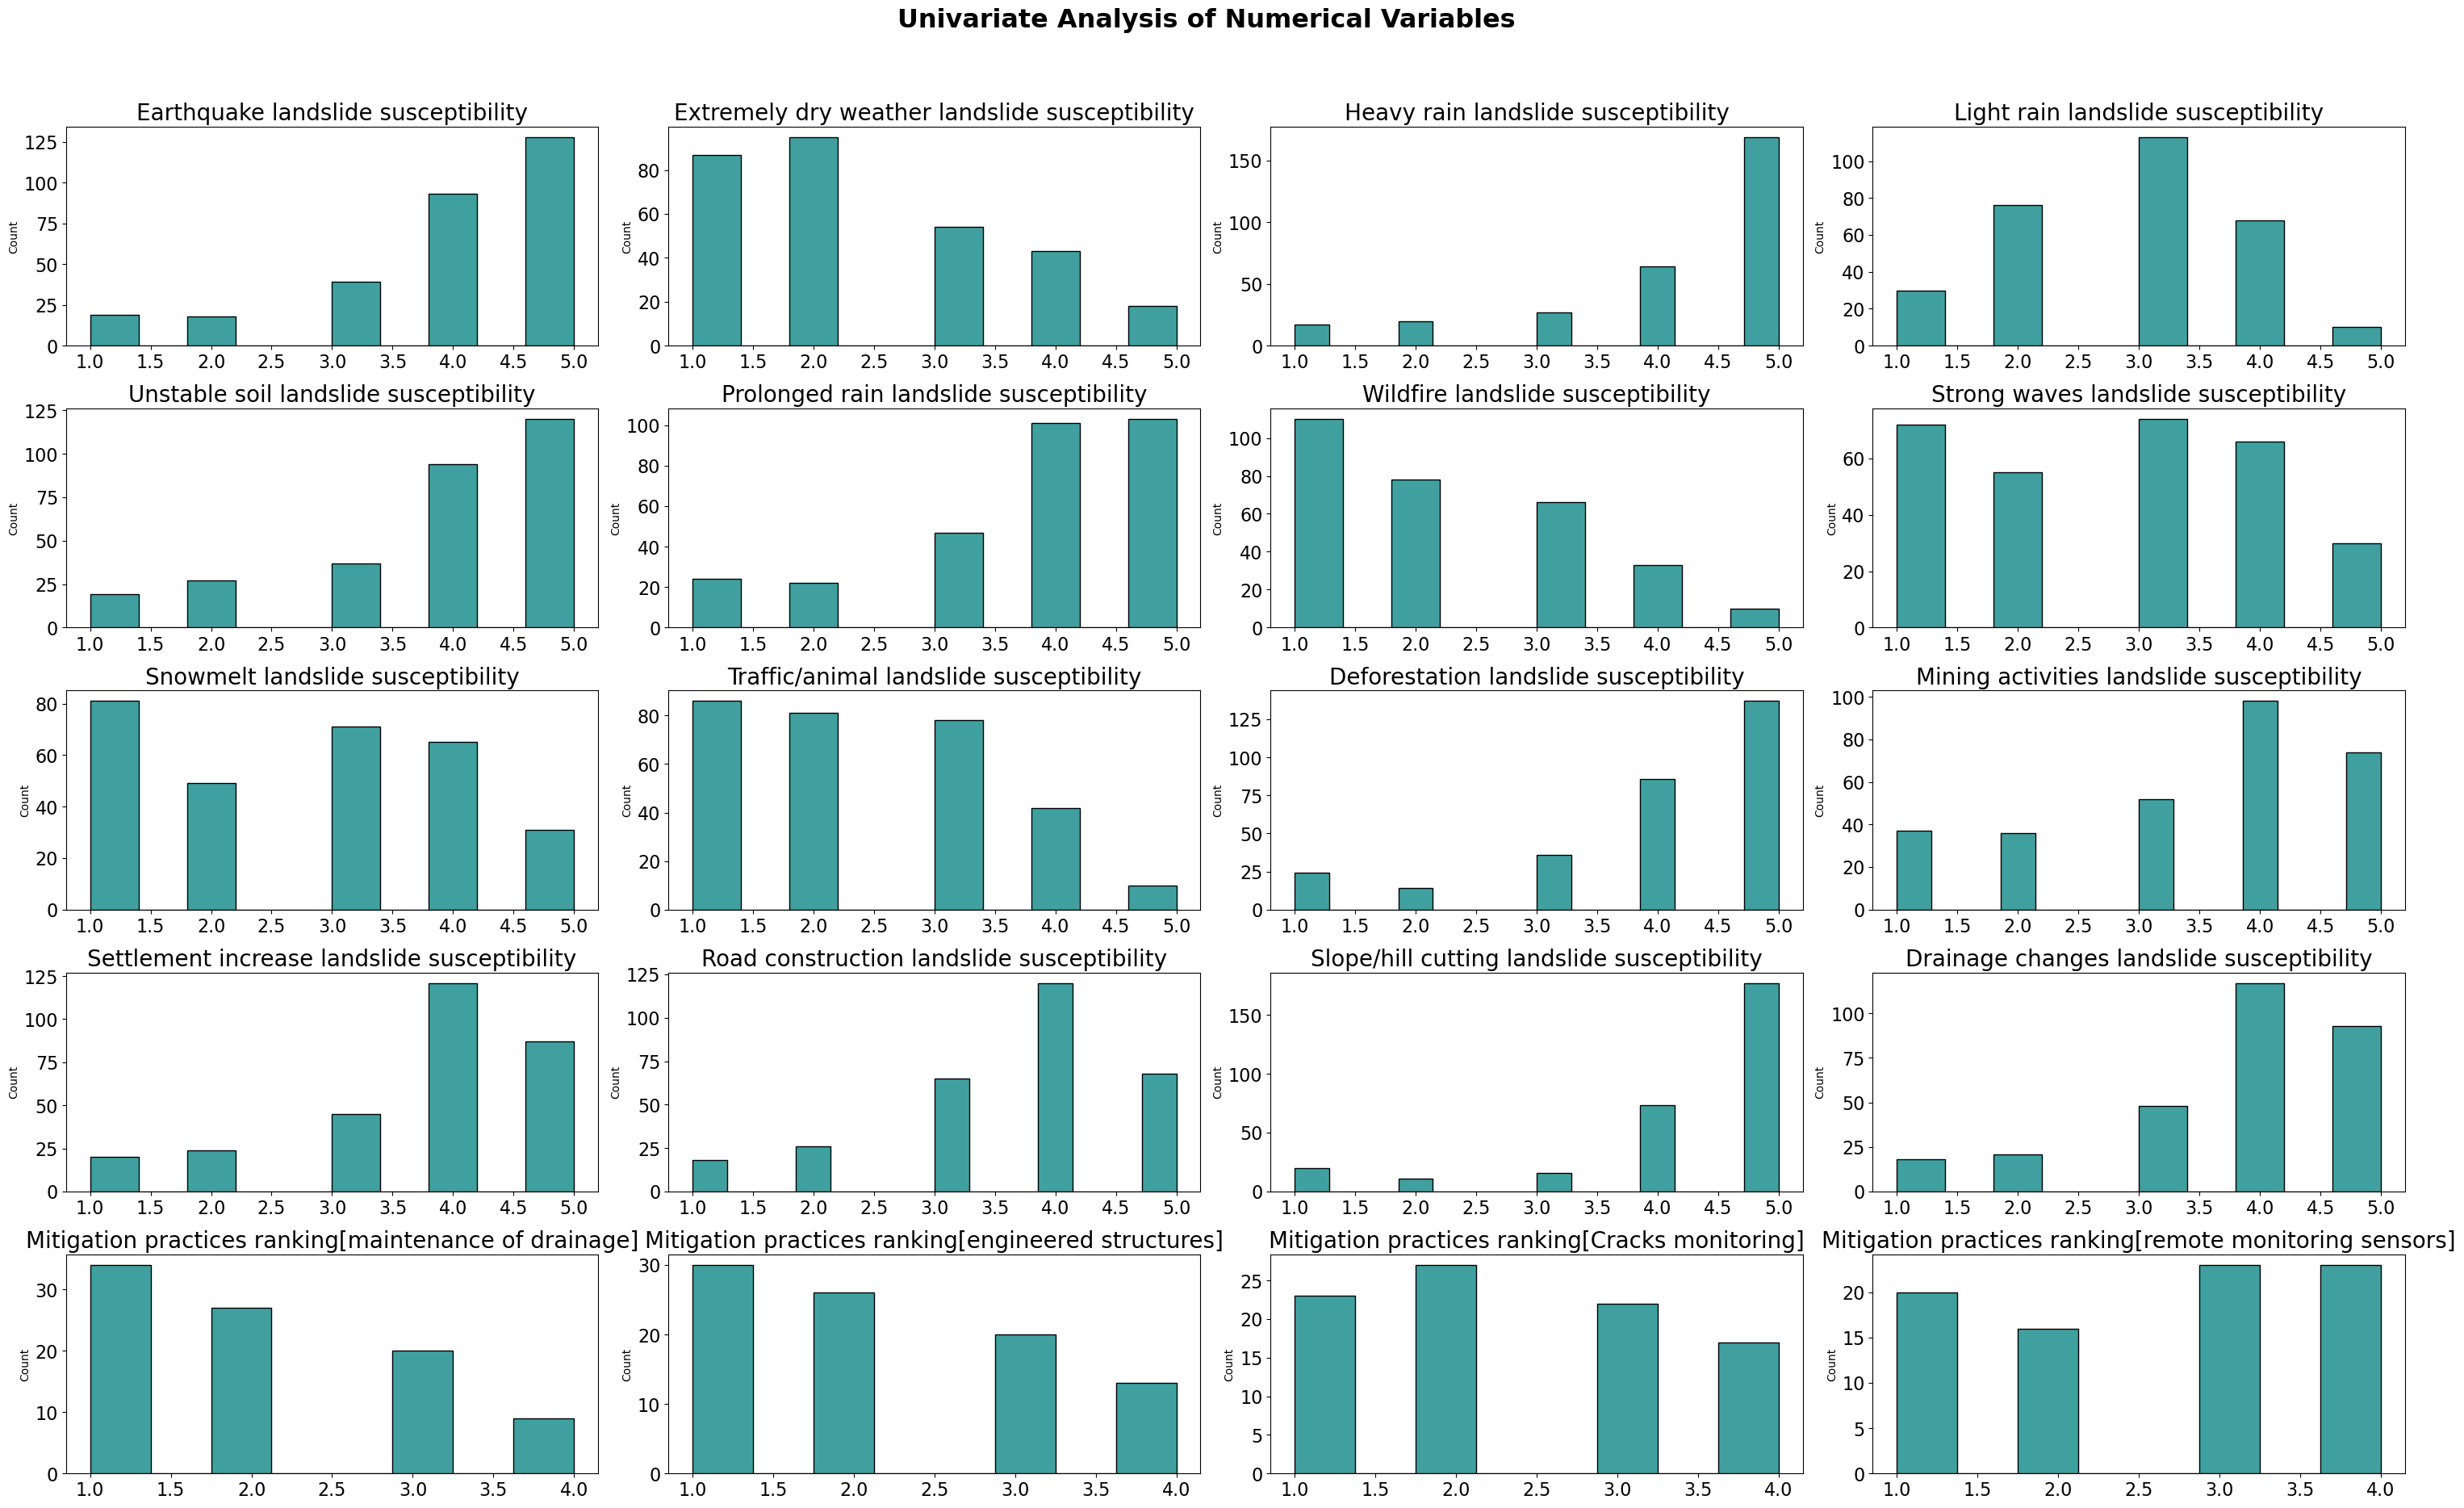

In [17]:
plt.figure(figsize=(30,140))
plt.suptitle('Univariate Analysis of Numerical Variables',
            fontsize= 23, fontweight='bold', y=1.004)
cat_cols = [col for col in df.columns if df[col].dtype != 'O']

for i, column in enumerate(cat_cols):
    ax = plt.subplot(40, 4, i+1)
    sns.histplot(data= df, x = column, ax= ax, color='teal')
    #plt.xlabel(column)
    ax.set_title(column, fontsize= 20)
    ax.set_xlabel('')
    ax.tick_params(labelsize=16)

#plt.subplots_adjust(top = 0.70, hspace=0.5)
plt.tight_layout()
plt.show()

### Univariate Analysis of Categorical Variables

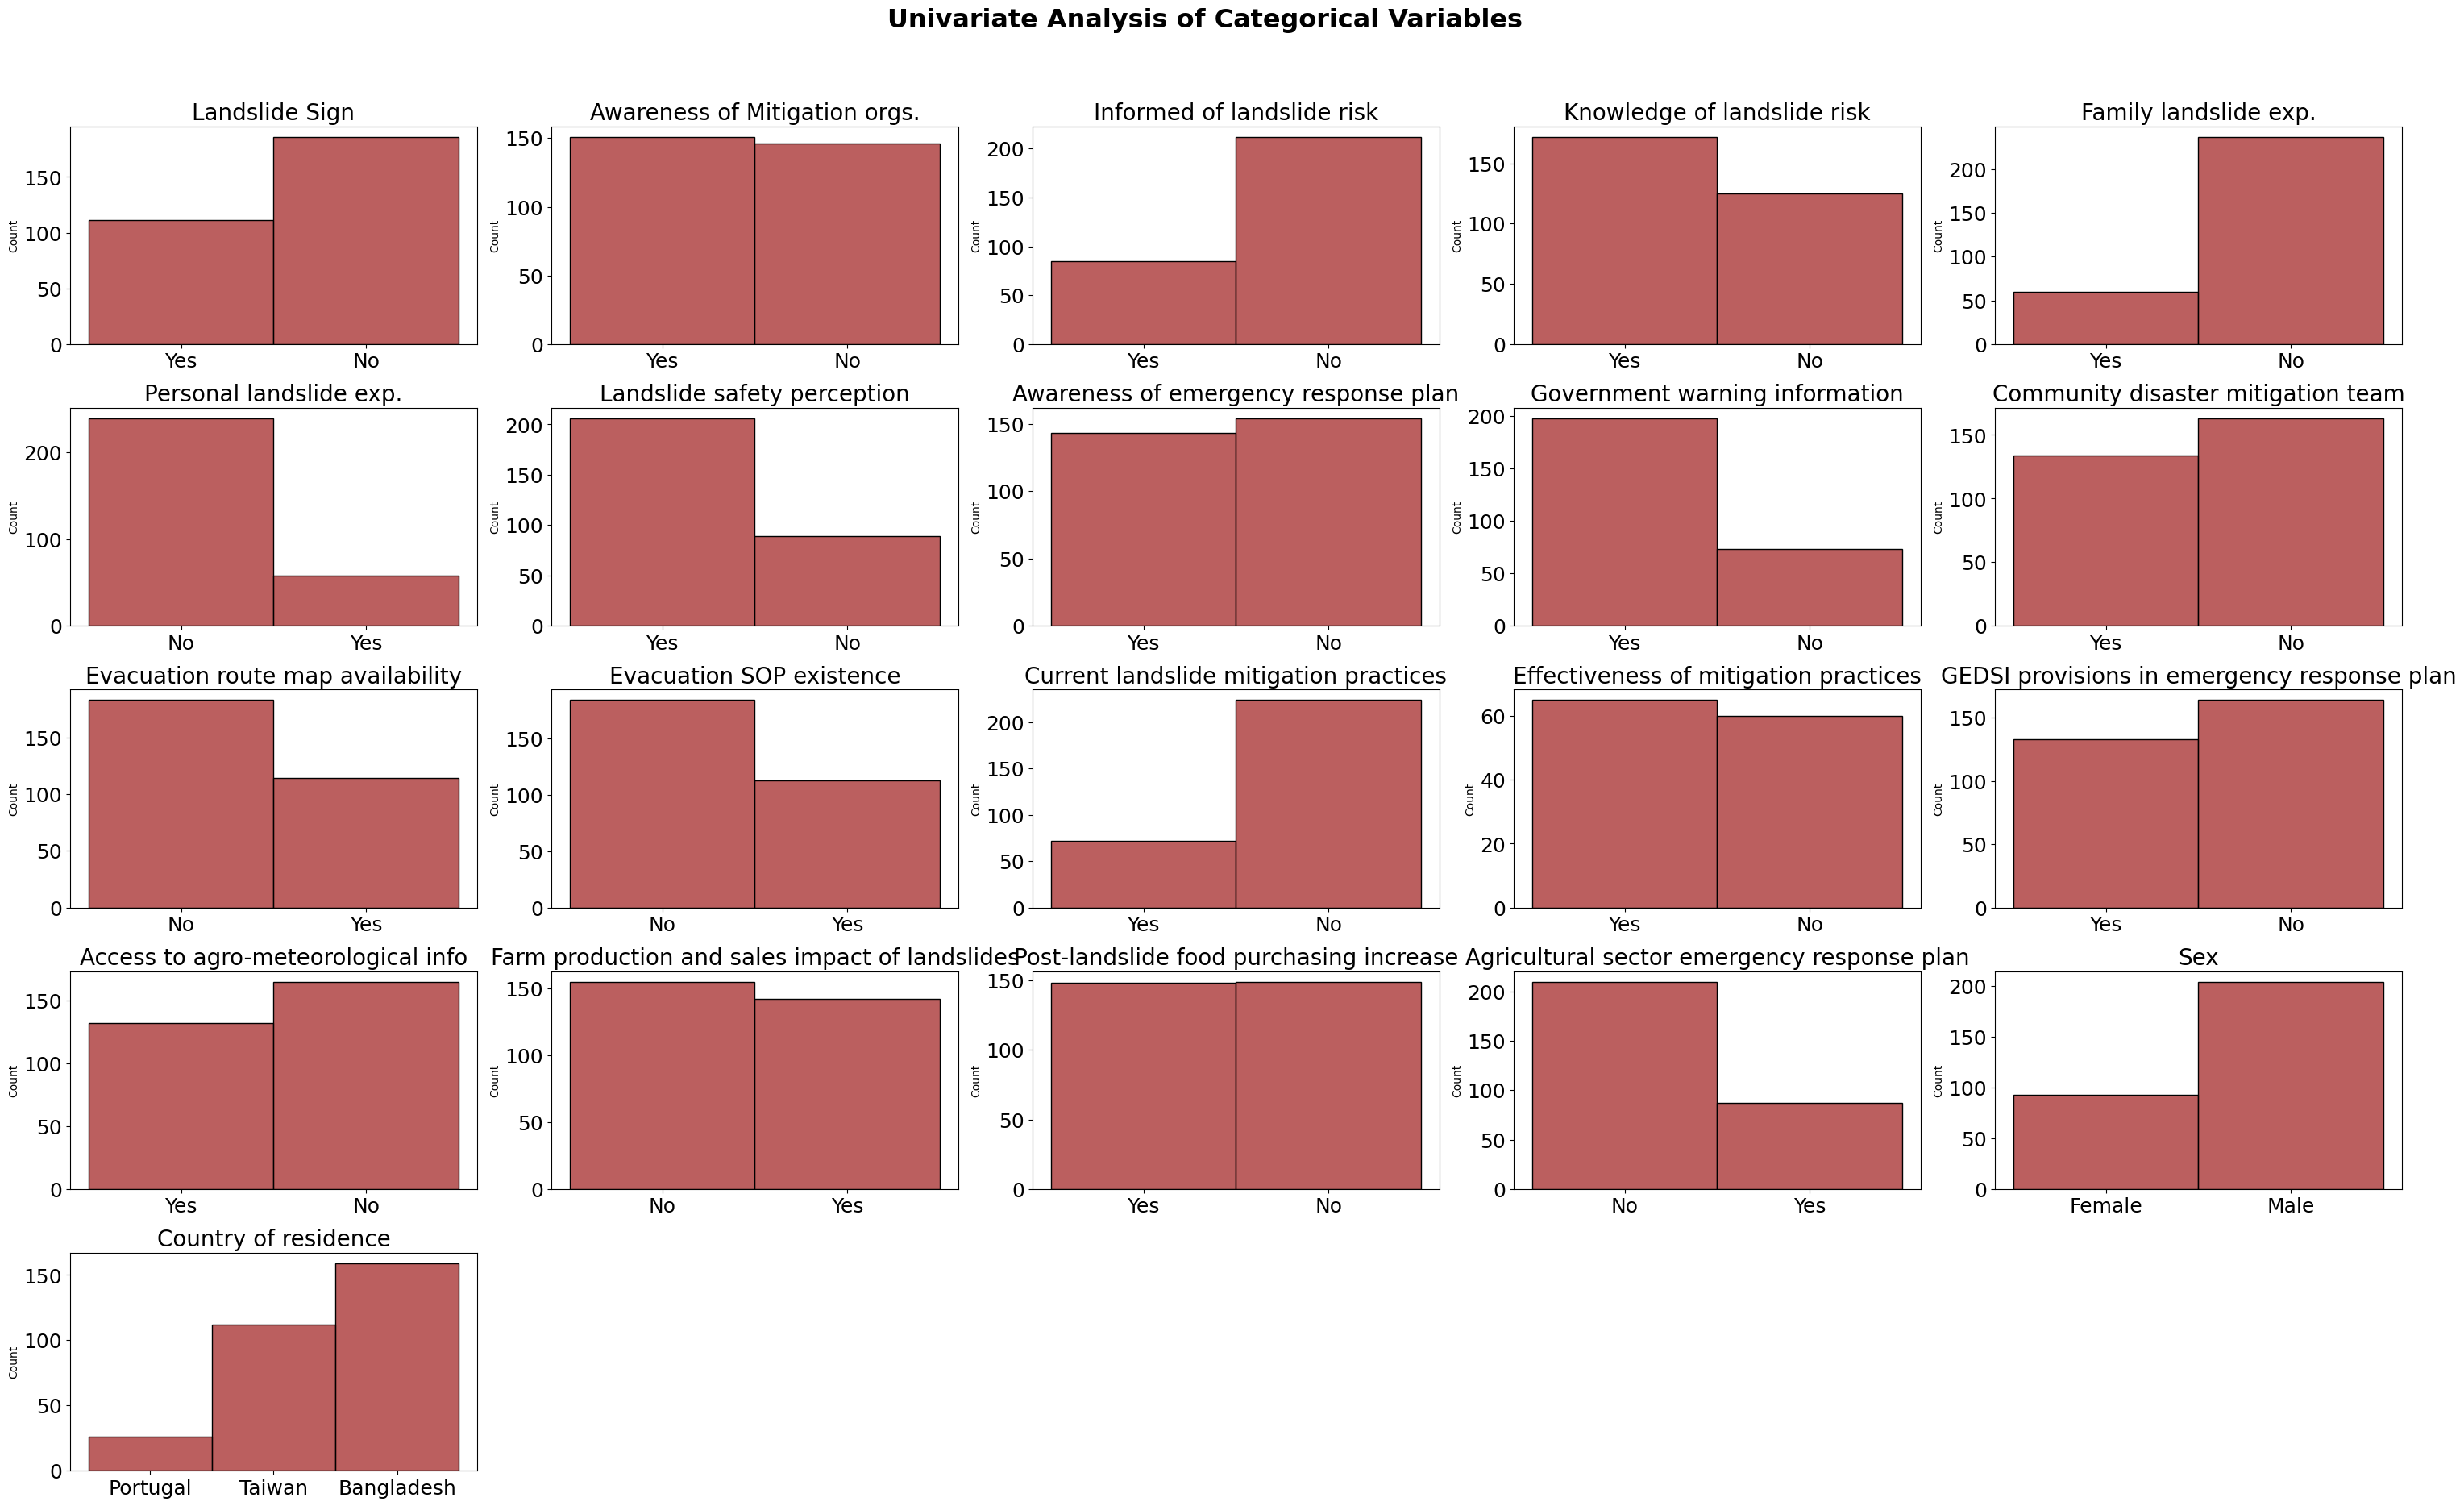

In [19]:
plt.figure(figsize=(30,140))
plt.suptitle('Univariate Analysis of Categorical Variables', 
            fontsize= 23, fontweight='bold', y=1.004)
columns = ['Experienced Disasters', 'Frequent Disasters', 'Landslide Sign Desc', 'Mitigation Practices Desc.',
           'Most impactful natural hazard', 'Recovery time after landslide event', 'Age']
cat_cols = [col for col in df.columns if df[col].dtype == 'O' and col not in columns]

for i, column in enumerate(cat_cols):
    ax = plt.subplot(40, 5, i+1)
    sns.histplot(data= df, x = column, ax= ax, color='brown')
    #plt.xlabel(column)
    ax.set_title(column, fontsize= 20)
    ax.set_xlabel('')
    ax.tick_params(labelsize=18)

#plt.subplots_adjust(top = 0.70, hspace=0.5)
plt.tight_layout()
plt.show()

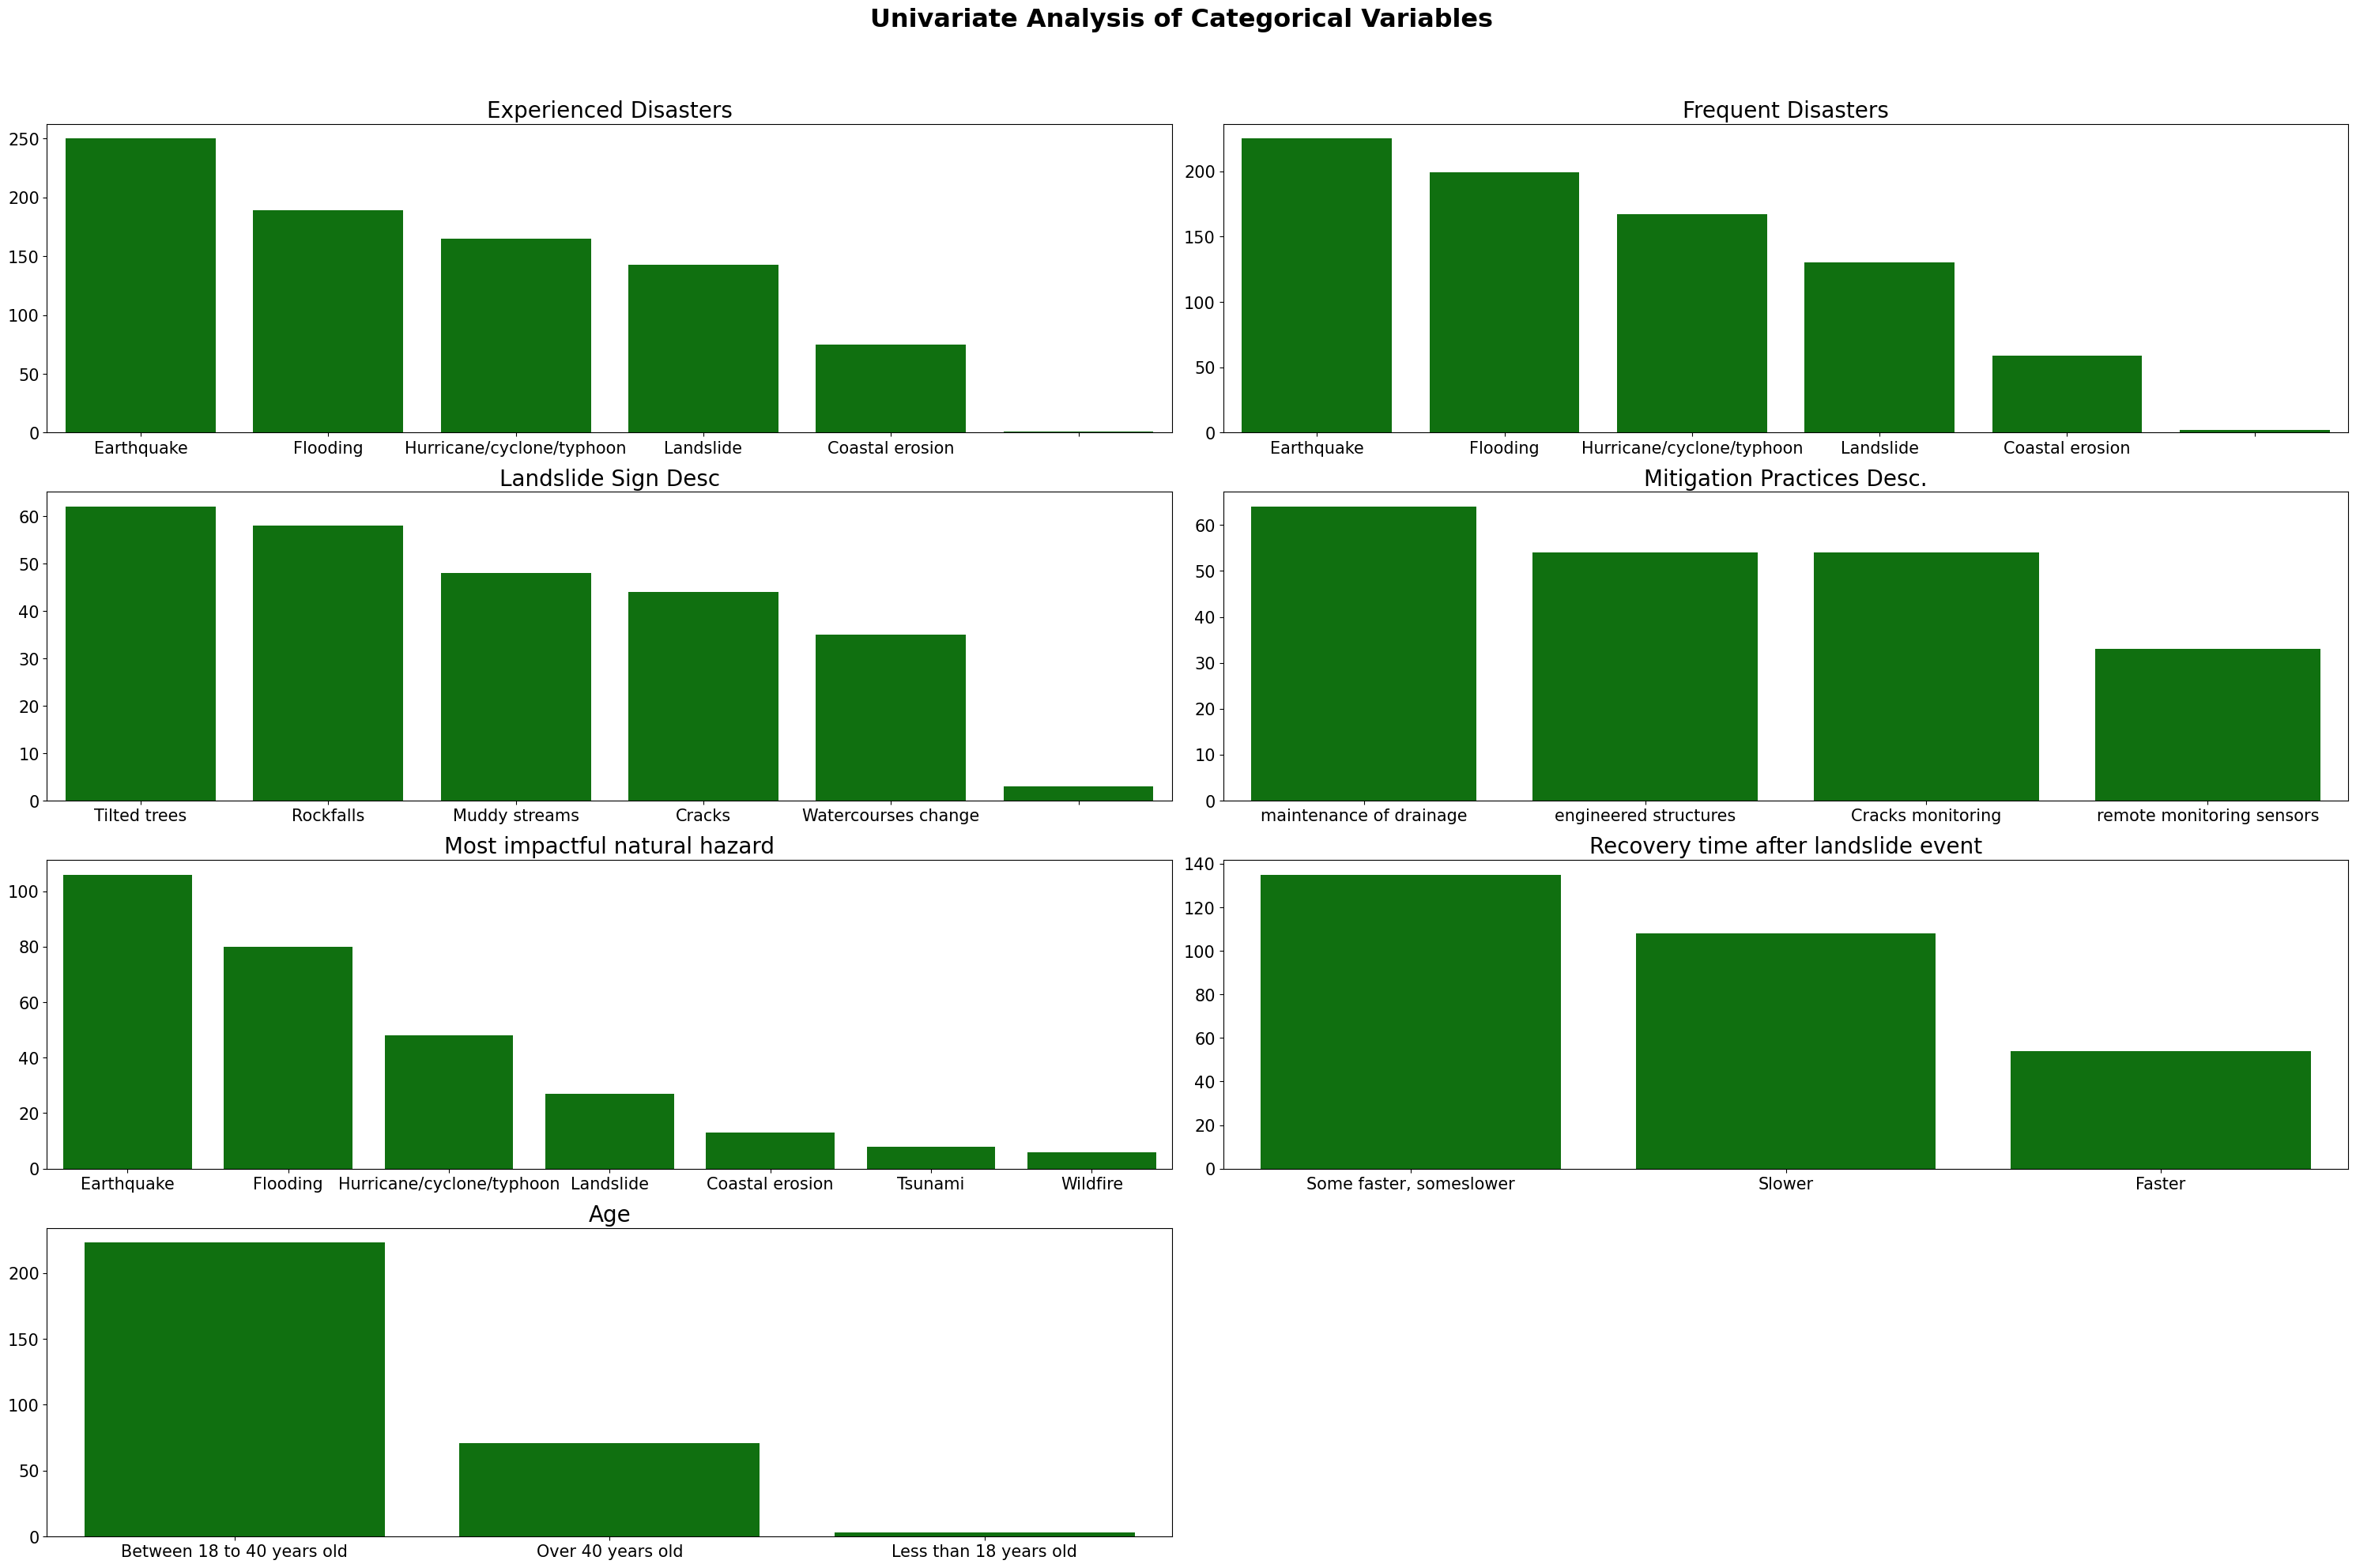

In [20]:
plt.figure(figsize=(30,140))
plt.suptitle('Univariate Analysis of Categorical Variables', 
            fontsize= 23, fontweight='bold', y=1.004)
columns = ['Experienced Disasters', 'Frequent Disasters', 'Landslide Sign Desc', 'Mitigation Practices Desc.',
          'Most impactful natural hazard', 'Recovery time after landslide event', 'Age']
cat_cols = [col for col in columns]

for i, column in enumerate(cat_cols):
    ax = plt.subplot(30, 2, i+1)
    values = df[column].str.split(';').explode()
    value_counts = values.value_counts()
    sns.barplot(x= value_counts.index, y=value_counts.values, ax= ax, color='green')
    #plt.xlabel(column)
    ax.set_title(column, fontsize= 20)
    ax.set_xlabel('')
    ax.tick_params(labelsize=15)

#plt.subplots_adjust(top = 0.70, hspace=0.5)
plt.tight_layout()
plt.show()

## 3.5. Encoding

### 3.5.1. Data Transformation: One-Hot Encoding for Fields with Multiple Values

In [17]:
cat_cols = ['Experienced Disasters', 'Frequent Disasters', 'Landslide Sign Desc', 'Mitigation Practices Desc.',
           'Most impactful natural hazard', 'Recovery time after landslide event', 'Country of residence']

prefix = ['Experienced_', 'Frequent_', 'Sign_', 'Mitigation Practices_', 'impactfulDisaster_', 'RecoveryTime_', 'Country_']
          

One_hot_df = pd.get_dummies(df[cat_cols].apply(lambda x: x.str.split(';', expand=True).stack()), 
                            prefix=prefix).groupby(level=0).sum()

df = df.join(One_hot_df).drop(cat_cols, axis=1)

### 3.5.2. Binary encoding

In [18]:
columns = ['Landslide Sign',
           'Awareness of Mitigation orgs.',
           'Informed of landslide risk',
           'Knowledge of landslide risk',
           'Family landslide exp.',
           'Personal landslide exp.',
           'Landslide safety perception',
           'Awareness of emergency response plan',
           'Government warning information',
           'Community disaster mitigation team',
           'Evacuation route map availability',
           'Evacuation SOP existence',
           'Effectiveness of mitigation practices',
           'GEDSI provisions in emergency response plan',
           'Access to agro-meteorological info',
           'Farm production and sales impact of landslides',
           'Post-landslide food purchasing increase',
           'Agricultural sector emergency response plan',
           'Current landslide mitigation practices'
           ]
          
df[columns] = df[columns].replace({'Yes':1, 'No':0})

### 3.5.3. Ordinal Encoding

In [19]:
# Age
Age_encoder = OrdinalEncoder(categories = [['Less than 18 years old', 'Between 18 to 40 years old', 'Over 40 years old']])
df['Age'] = Age_encoder.fit_transform(df[['Age']])

In [20]:
# Sex
Sex_encoder = OrdinalEncoder(categories = [['Male', 'Female']])
df['Sex'] = Sex_encoder.fit_transform(df[['Sex']])

In [21]:
df.drop(['Sign__', 'Experienced__', 'Frequent__'], axis=1, inplace=True)
df.head()

,Landslide Sign,Awareness of Mitigation orgs.,Informed of landslide risk,Knowledge of landslide risk,Family landslide exp.,Personal landslide exp.,Earthquake landslide susceptibility,Extremely dry weather landslide susceptibility,Heavy rain landslide susceptibility,Light rain landslide susceptibility,Unstable soil landslide susceptibility,Prolonged rain landslide susceptibility,Wildfire landslide susceptibility,Strong waves landslide susceptibility,Snowmelt landslide susceptibility,Traffic/animal landslide susceptibility,Deforestation landslide susceptibility,Mining activities landslide susceptibility,Settlement increase landslide susceptibility,Road construction landslide susceptibility,Slope/hill cutting landslide susceptibility,Drainage changes landslide susceptibility,Landslide safety perception,Awareness of emergency response plan,Government warning information,Community disaster mitigation team,Evacuation route map availability,Evacuation SOP existence,Current landslide mitigation practices,Mitigation practices ranking[maintenance of drainage],Mitigation practices ranking[engineered structures],Mitigation practices ranking[Cracks monitoring],Mitigation practices ranking[remote monitoring sensors],Effectiveness of mitigation practices,GEDSI provisions in emergency response plan,Access to agro-meteorological info,Farm production and sales impact of landslides,Post-landslide food purchasing increase,Agricultural sector emergency response plan,Sex,Age,Experienced__Coastal erosion,Experienced__Earthquake,Experienced__Flooding,Experienced__Hurricane/cyclone/typhoon,Experienced__Landslide,Frequent__Coastal erosion,Frequent__Earthquake,Frequent__Flooding,Frequent__Hurricane/cyclone/typhoon,Frequent__Landslide,Sign__Cracks,Sign__Muddy streams,Sign__Rockfalls,Sign__Tilted trees,Sign__Watercourses change,Mitigation Practices__Cracks monitoring,Mitigation Practices__engineered structures,Mitigation Practices__maintenance of drainage,Mitigation Practices__remote monitoring sensors,impactfulDisaster__Coastal erosion,impactfulDisaster__Earthquake,impactfulDisaster__Flooding,impactfulDisaster__Hurricane/cyclone/typhoon,impactfulDisaster__Landslide,impactfulDisaster__Tsunami,impactfulDisaster__Wildfire,RecoveryTime__Faster,RecoveryTime__Slower,"RecoveryTime__Some faster, someslower",Country__Bangladesh,Country__Portugal,Country__Taiwan
1,1,1,1,1,1,0,3,3,5,1,1,4,3,4,1,1,4,1,4,3,5,3,1.0,1,1.0,1,0,0,1.0,1.0,1.0,1.0,4.0,1.0,1,1,0,1,0,1.0,2.0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,0,1,0,1,1,0,4,1,5,3,4,5,4,3,5,4,4,4,5,5,5,4,1.0,1,1.0,1,1,1,0.0,NaN,NaN,NaN,NaN,NaN,1,1,0,1,1,0.0,2.0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,0,1,0,1,0,0,2,1,5,3,3,5,1,3,3,1,3,3,4,4,5,4,1.0,1,0.0,1,1,1,0.0,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0,0.0,2.0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,1,1,1,1,0,0,4,2,5,2,5,4,3,3,3,3,3,4,4,4,4,4,0.0,1,1.0,1,1,1,0.0,NaN,NaN,NaN,NaN,1.0,1,0,1,1,0,0.0,2.0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
5,1,1,0,1,0,1,4,2,5,3,5,4,1,2,1,3,5,3,3,4,5,4,1.0,1,NaN,0,0,0,1.0,2.0,3.0,4.0,1.0,1.0,1,1,0,1,1,0.0,1.0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1


In [52]:
df.to_excel('G:/immigration/Article/LandSlide/Numeric_Data.xlsx', index= False)

In [22]:
dtypes = df.dtypes
dtypes[dtypes =='O']

Series([], dtype: object)

In [21]:
len(df.columns)

73

In [22]:
df = df.drop(['Mitigation practices ranking[maintenance of drainage]', 'Mitigation practices ranking[engineered structures]',
              'Mitigation practices ranking[Cracks monitoring]', 'Mitigation practices ranking[remote monitoring sensors]',
              'Effectiveness of mitigation practices'], axis=1)

In [23]:
df.dropna(inplace=True)

In [24]:
d = df.isna().sum()
d[d>0]

Series([], dtype: int64)

## Determining the features, target variable, and train/test datasets

In [25]:
X = df.drop('Landslide safety perception', axis=1)
Y = df['Landslide safety perception']
Y = np.reshape(Y, (-1,1))

In [26]:
print(X.shape, Y.shape)

(269, 67) (269, 1)


## Logistic Regression

In [32]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(X, Y, test_size=0.35, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (174, 67)
the shape of the training set (target) is: (174, 1)

the shape of the cross validation set (input) is: (47, 67)
the shape of the cross validation set (target) is: (47, 1)

the shape of the test set (input) is: (48, 67)
the shape of the test set (target) is: (48, 1)


In [33]:
train_losses = []
cv_losses = []
models = []
scalers = []
for degree in range(1, 5):
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias = False)
    x_train_poly = poly.fit_transform(x_train)
    
    # Perform Feature Selection
    selector = SelectKBest(chi2, k=10)
    x_train_poly = selector.fit_transform(x_train_poly, y_train)
    
    # Scale the training set
    Scaler = StandardScaler()
    x_train_norm = Scaler.fit_transform(x_train_poly)
    scalers.append(Scaler)
    
    # Create and train the model
    logistic_regression = LogisticRegression(penalty= 'l1', solver='liblinear', max_iter=1000)
    logistic_regression.fit(x_train_norm, y_train)
    models.append(logistic_regression)
    
    # Compute the training binary cross-entropy
    y_hat = logistic_regression.predict(x_train_norm)
    train_loss = log_loss(y_hat, y_train, labels=[0,1])
    train_losses.append(train_loss)
    
    # Add polynomial features and scale the cross validation set
    x_cv_poly = poly.transform(x_cv)
    x_cv_poly = selector.transform(x_cv_poly)
    x_cv_norm = Scaler.transform(x_cv_poly)
    
    # Compute the cross validation log loss
    y_hat_cv = logistic_regression.predict(x_cv_norm)
    cv_loss = log_loss(y_hat_cv, y_cv, labels=[0,1])
    cv_losses.append(cv_loss)

C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expec

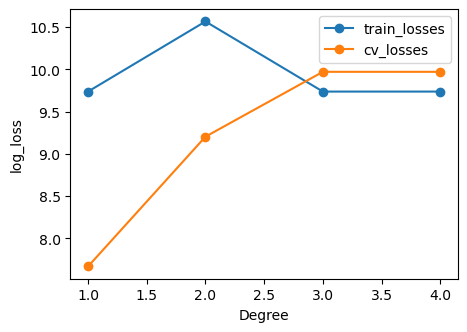

In [34]:
fig, ax = plt.subplots(figsize=(5,3.5))
ax.plot(range(1,5), train_losses, marker='o', label='train_losses')
ax.plot(range(1,5), cv_losses, marker='o', label='cv_losses')
ax.set_xlabel('Degree')
ax.set_ylabel('log_loss')
plt.legend()
plt.show()

In [35]:
train_losses = []
cv_losses = []
models = []
scalers = []
for c in [1, 0.5, 0.1, 0.05]:
    # Add polynomial features to the training set
    #poly = PolynomialFeatures(3, include_bias = False)
    #x_train_poly = poly.fit_transform(x_train)
    x_train_poly = x_train
    
    # Perform Feature Selection
    selector = SelectKBest(chi2, k=10)
    x_train_poly = selector.fit_transform(x_train_poly, y_train)
    
    # Scale the training set
    Scaler = StandardScaler()
    x_train_norm = Scaler.fit_transform(x_train_poly)
    scalers.append(Scaler)
    
    # Create and train the model
    logistic_regression = LogisticRegression(penalty= 'l1', solver='liblinear', max_iter=1000, C = c)
    logistic_regression.fit(x_train_norm, y_train)
    models.append(logistic_regression)
    
    # Compute the training binary cross-entropy
    y_hat = logistic_regression.predict(x_train_norm)
    train_loss = log_loss(y_hat, y_train, labels=[0,1])
    train_losses.append(train_loss)
    
    # Add polynomial features and scale the cross validation set
    #x_cv_poly = poly.transform(x_cv)
    x_cv_poly = x_cv
    x_cv_poly = selector.transform(x_cv_poly)
    x_cv_norm = Scaler.transform(x_cv_poly)
    
    # Compute the cross validation log loss
    y_hat_cv = logistic_regression.predict(x_cv_norm)
    cv_loss = log_loss(y_hat_cv, y_cv, labels=[0,1])
    cv_losses.append(cv_loss)

C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expec

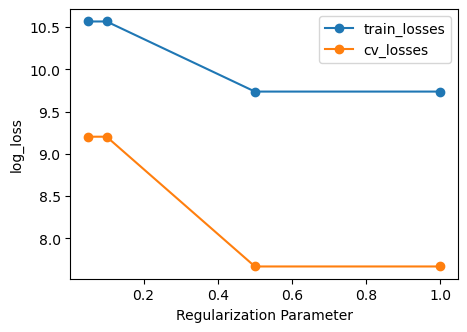

In [36]:
Cs = [1, 0.5, 0.1, 0.05]
fig, ax = plt.subplots(figsize=(5,3.5))
ax.plot(Cs, train_losses, marker='o', label='train_losses')
ax.plot(Cs, cv_losses, marker='o', label='cv_losses')
ax.set_xlabel('Regularization Parameter')
ax.set_ylabel('log_loss')
plt.legend()
plt.show()

In [37]:
degree = 3
c = 0.5

# Add polynomial features to the training set
poly = PolynomialFeatures(degree, include_bias = False)
x_train_poly = poly.fit_transform(x_train)
    
# Perform Feature Selection
selector = SelectKBest(chi2, k=10)
x_train_poly = selector.fit_transform(x_train_poly, y_train)
    
# Scale the training set
Scaler = StandardScaler()
x_train_norm = Scaler.fit_transform(x_train_poly)
    
# Create and train the model
logistic_regression = LogisticRegression(penalty= 'l1', solver='liblinear', max_iter=1000, C = c)
logistic_regression.fit(x_train_norm, y_train)

# Compute the training binary cross-entropy
y_hat = logistic_regression.predict(x_train_norm)
train_loss = log_loss(y_hat, y_train, labels=[0,1])

# Add polynomial features and scale the cross validation set
x_cv_poly = poly.transform(x_cv)
x_cv_poly = selector.transform(x_cv_poly)
x_cv_norm = Scaler.transform(x_cv_poly)
    
# Compute the cross validation log loss
y_hat_cv = logistic_regression.predict(x_cv_norm)
cv_loss = log_loss(y_hat_cv, y_cv, labels=[0,1])

C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
# Add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias = False)
x_test_poly = poly.fit_transform(x_test)

# Scale the test set
x_test_poly = selector.transform(x_test_poly)
x_test_norm = Scaler.transform(x_test_poly)

# Compute the test log loss
y_hat_test = logistic_regression.predict(x_test_norm)
test_loss = log_loss(y_hat_test, y_test, labels=[0,1])

print(f"Training log_loss: {train_loss:.2f}")
print(f"Cross Validation log_loss: {cv_loss:.2f}")
print(f"Test log_loss: {test_loss:.2f}\n")

test_accuracy = accuracy_score(y_test, y_hat_test)
test_precision = precision_score(y_test, y_hat_test)
test_recall = recall_score(y_test, y_hat_test)
test_f1 = f1_score(y_test, y_hat_test)
print(f'accuracy in test set: {test_accuracy*100:.2f}\n'
      f'precision in test set: {test_precision*100:.2f}\n'
      f'recall in test set: {test_recall*100:.2f}\n'
      f'f1 in test set: {test_f1*100:.2f}\n')

print(f'score of training set: {logistic_regression.score(x_train_norm, y_train):.2f}\n'
      f'score of cross validation set: {logistic_regression.score(x_cv_norm, y_cv):.2f}\n'
      f'score of test set: {logistic_regression.score(x_test_norm, y_test):.2f}\n')

Training log_loss: 9.74
Cross Validation log_loss: 9.97
Test log_loss: 13.52

accuracy in test set: 62.50
precision in test set: 69.23
recall in test set: 81.82
f1 in test set: 75.00

score of training set: 0.73
score of cross validation set: 0.72
score of test set: 0.62



## XGBoost

In [196]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (215, 67)
the shape of the training set (target) is: (215, 1)

the shape of the test set (input) is: (54, 67)
the shape of the test set (target) is: (54, 1)


In [197]:
n = int(len(x_train)*0.8)
x_train_fit, x_train_eval, y_train_fit, y_train_eval = x_train[:n], x_train[n:], y_train[:n], y_train[n:]

In [198]:
feature_selector = SelectKBest(score_func=f_classif, k=10)
x_train_fit = feature_selector.fit_transform(x_train_fit, y_train_fit)
x_train_eval = feature_selector.transform(x_train_eval)

C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [199]:
xbg_model = XGBClassifier(n_estimators=5, learning_rate=0.1, verbosity=1, random_state = 1, early_stopping_rounds=1)

In [ ]:
xbg_model.fit(x_train_fit, y_train_fit, eval_set = [(x_train_eval, y_train_eval)])

In [ ]:
xgb_model.best_iteration

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(x_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(x_test),y_test):.4f}")

## Decision Tree

In [26]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (215, 67)
the shape of the training set (target) is: (215, 1)

the shape of the test set (input) is: (54, 67)
the shape of the test set (target) is: (54, 1)


In [59]:
min_sample_split_list = [2, 6, 12, 16, 20, 30, 50, 70, 90, 110]
max_depth_list = [1, 2, 3, 4, 6, 8, 10, 12, 14, 16, None]

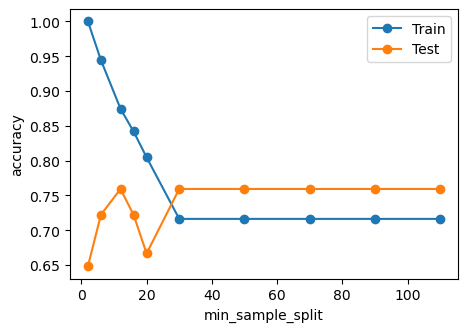

In [60]:
accuracy_train_list = []
accuracy_test_list = []
for min_sample_split in min_sample_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_sample_split, random_state=1).fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_hat = model.predict(x_test)
    accuracy_train = accuracy_score(y_pred_train, y_train)
    accuracy_train_list.append(accuracy_train)
    accuracy_test = accuracy_score(y_hat, y_test)
    accuracy_test_list.append(accuracy_test)

fig, ax = plt.subplots(figsize= (5,3.5))
ax.plot(min_sample_split_list, accuracy_train_list, marker='o', label='Train')
ax.plot(min_sample_split_list, accuracy_test_list, marker = 'o', label= 'Test')
plt.legend()
ax.set_xlabel('min_sample_split')
ax.set_ylabel('accuracy')
plt.show()

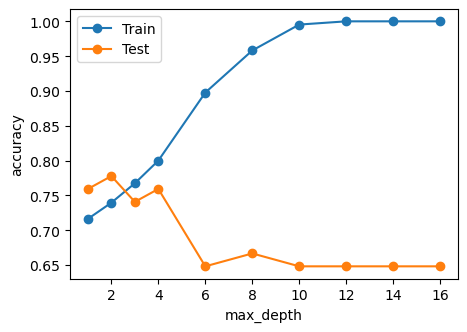

In [48]:
accuracy_train_list = []
accuracy_test_list = []
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth = max_depth , random_state=1).fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_hat = model.predict(x_test)
    accuracy_train = accuracy_score(y_pred_train, y_train)
    accuracy_train_list.append(accuracy_train)
    accuracy_test = accuracy_score(y_hat, y_test)
    accuracy_test_list.append(accuracy_test)

fig, ax = plt.subplots(figsize= (5,3.5))
ax.plot(max_depth_list, accuracy_train_list, marker='o', label='Train')
ax.plot(max_depth_list, accuracy_test_list, marker = 'o', label= 'Test')
plt.legend()
ax.set_xlabel('max_depth')
ax.set_ylabel('accuracy')
plt.show()

In [61]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 12, max_depth = 4, random_state = 1).fit(x_train,y_train)

In [62]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(x_train),y_train):.4f}")
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(x_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.7814
Metrics test:
	Accuracy score: 0.7593


## Random Forest

In [122]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (215, 67)
the shape of the training set (target) is: (215, 1)

the shape of the test set (input) is: (54, 67)
the shape of the test set (target) is: (54, 1)


In [123]:
min_sample_split_list = [2, 6, 12, 16, 20, 30, 50, 70, 90, 110]
max_depth_list = [1, 2, 3, 4, 6, 8, 10, 12, 14, 16, None]
n_estimators_list = [10,50,100,500, 700]

C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

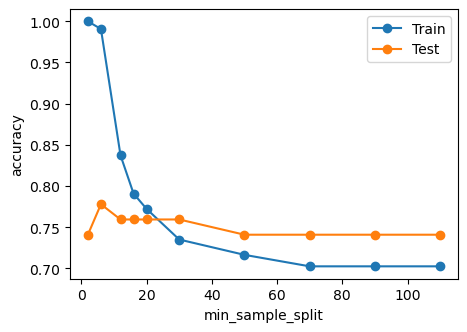

In [124]:
accuracy_train_list = []
accuracy_test_list = []
for min_sample_split in min_sample_split_list:
    model = RandomForestClassifier(min_samples_split = min_sample_split, random_state=1).fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_hat = model.predict(x_test)
    accuracy_train = accuracy_score(y_pred_train, y_train)
    accuracy_train_list.append(accuracy_train)
    accuracy_test = accuracy_score(y_hat, y_test)
    accuracy_test_list.append(accuracy_test)

fig, ax = plt.subplots(figsize= (5,3.5))
ax.plot(min_sample_split_list, accuracy_train_list, marker='o', label='Train')
ax.plot(min_sample_split_list, accuracy_test_list, marker = 'o', label= 'Test')
plt.legend()
ax.set_xlabel('min_sample_split')
ax.set_ylabel('accuracy')
plt.show()

C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

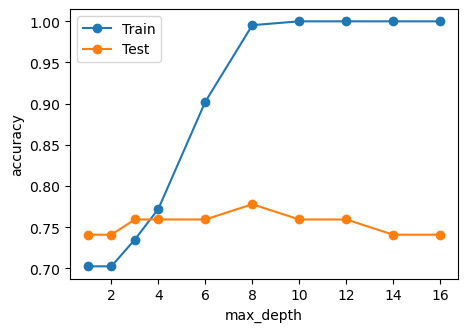

In [128]:
accuracy_train_list = []
accuracy_test_list = []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth= max_depth, random_state=1).fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_hat = model.predict(x_test)
    accuracy_train = accuracy_score(y_pred_train, y_train)
    accuracy_train_list.append(accuracy_train)
    accuracy_test = accuracy_score(y_hat, y_test)
    accuracy_test_list.append(accuracy_test)

fig, ax = plt.subplots(figsize= (5,3.5))
ax.plot(max_depth_list, accuracy_train_list, marker='o', label='Train')
ax.plot(max_depth_list, accuracy_test_list, marker = 'o', label= 'Test')
plt.legend()
ax.set_xlabel('max_depth')
ax.set_ylabel('accuracy')
plt.show()

C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

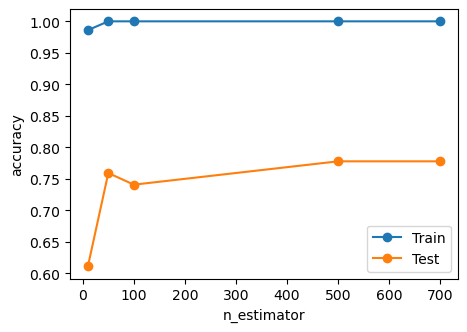

In [120]:
accuracy_train_list = []
accuracy_test_list = []
for n_estimator in n_estimators_list:
    model = RandomForestClassifier(n_estimators= n_estimator , random_state=1).fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_hat = model.predict(x_test)
    accuracy_train = accuracy_score(y_pred_train, y_train)
    accuracy_train_list.append(accuracy_train)
    accuracy_test = accuracy_score(y_hat, y_test)
    accuracy_test_list.append(accuracy_test)

fig, ax = plt.subplots(figsize= (5,3.5))
ax.plot(n_estimators_list, accuracy_train_list, marker='o', label='Train')
ax.plot(n_estimators_list, accuracy_test_list, marker = 'o', label= 'Test')
plt.legend()
ax.set_xlabel('n_estimator')
ax.set_ylabel('accuracy')
plt.show()

In [129]:
random_forest_model = RandomForestClassifier(n_estimators = 500, max_depth = 4, min_samples_split = 20).fit(x_train,y_train)

C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [130]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(x_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(x_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.7256
Metrics test:
	Accuracy score: 0.7593


## Support Vector Machine

In [186]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (215, 67)
the shape of the training set (target) is: (215, 1)

the shape of the test set (input) is: (54, 67)
the shape of the test set (target) is: (54, 1)


In [187]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = [1, 0.5, 0.2, 0.1, 0.05]
gammas= [1, 0.5, 0.2, 0.1, 0.05]

C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

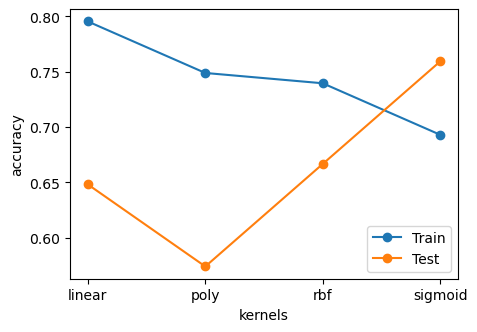

In [188]:
accuracy_train_list = []
accuracy_test_list = []
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=1, class_weight= 'balanced', max_iter= 1000).fit(x_train, y_train)
    y_pred_train = svm.predict(x_train)
    accuracy_train = accuracy_score(y_pred_train, y_train)
    y_hat = svm.predict(x_test)
    accuracy_test = accuracy_score(y_hat, y_test)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

fig, ax = plt.subplots(figsize= (5,3.5))
ax.plot(kernels, accuracy_train_list, marker='o', label='Train')
ax.plot(kernels, accuracy_test_list, marker = 'o', label= 'Test')
plt.legend()
ax.set_xlabel('kernels')
ax.set_ylabel('accuracy')
plt.show()

C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expec

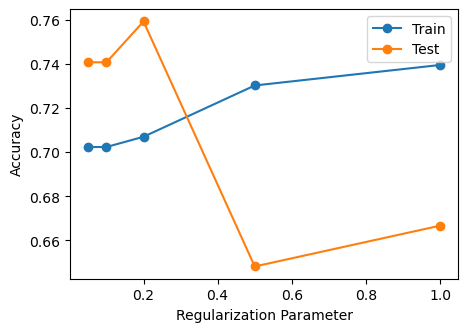

In [189]:
accuracy_train_list = []
accuracy_test_list = []
for c in Cs:
    svm = SVC(kernel= 'rbf', random_state=1, class_weight= 'balanced', max_iter= 1000, C= c).fit(x_train, y_train)
    y_pred_train = svm.predict(x_train)
    accuracy_train = accuracy_score(y_pred_train, y_train)
    y_hat = svm.predict(x_test)
    accuracy_test = accuracy_score(y_hat, y_test)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

fig, ax = plt.subplots(figsize= (5,3.5))
ax.plot(Cs, accuracy_train_list, marker='o', label='Train')
ax.plot(Cs, accuracy_test_list, marker = 'o', label= 'Test')
plt.legend()
ax.set_xlabel('Regularization Parameter')
ax.set_ylabel('Accuracy')
plt.show()

C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expec

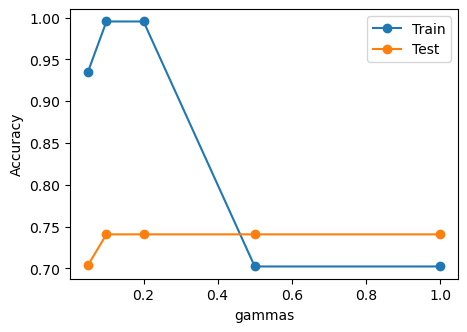

In [190]:
accuracy_train_list = []
accuracy_test_list = []
for gamma in gammas:
    svm = SVC(kernel= 'rbf', random_state=1, class_weight= 'balanced', max_iter= 1000, C= 0.4, gamma= gamma).fit(x_train, y_train)
    y_pred_train = svm.predict(x_train)
    accuracy_train = accuracy_score(y_pred_train, y_train)
    y_hat = svm.predict(x_test)
    accuracy_test = accuracy_score(y_hat, y_test)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

fig, ax = plt.subplots(figsize= (5,3.5))
ax.plot(gammas, accuracy_train_list, marker='o', label='Train')
ax.plot(gammas, accuracy_test_list, marker = 'o', label= 'Test')
plt.legend()
ax.set_xlabel('gammas')
ax.set_ylabel('Accuracy')
plt.show()

In [191]:
svm = SVC(kernel= 'rbf', random_state=1, class_weight= 'balanced', max_iter= 1000, C= 0.4, gamma= 0.1).fit(x_train, y_train)

C:\Users\BARTAR\anaconda3\envs\mlenv\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [192]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(svm.predict(x_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(svm.predict(x_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9953
Metrics test:
	Accuracy score: 0.7407
